In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

files = os.listdir("./invoices")
invoices = list(filter(lambda file: 'nubank' in file, files))
invoices_df = pd.DataFrame()

for invoice in invoices:
    df = pd.read_csv(f"./invoices/{invoice}", encoding='utf-8')
    invoices_df = invoices_df.append(df, ignore_index=True)
    print(f"Reading invoice {invoice} [OK]")

Reading invoice nubank-2020-01.csv [OK]
Reading invoice nubank-2018-11.csv [OK]
Reading invoice nubank-2018-05.csv [OK]
Reading invoice nubank-2018-10.csv [OK]
Reading invoice nubank-2018-06.csv [OK]
Reading invoice nubank-2018-12.csv [OK]
Reading invoice nubank-2018-07.csv [OK]
Reading invoice nubank-2020-03.csv [OK]
Reading invoice nubank-2019-08.csv [OK]
Reading invoice nubank-2019-09.csv [OK]
Reading invoice nubank-2019-01.csv [OK]
Reading invoice nubank-2019-02.csv [OK]
Reading invoice nubank-2019-03.csv [OK]
Reading invoice nubank-2019-07.csv [OK]
Reading invoice nubank-2019-12.csv [OK]
Reading invoice nubank-2019-06.csv [OK]
Reading invoice nubank-2019-10.csv [OK]
Reading invoice nubank-2019-04.csv [OK]
Reading invoice nubank-2019-05.csv [OK]
Reading invoice nubank-2019-11.csv [OK]
Reading invoice nubank-2018-09.csv [OK]
Reading invoice nubank-2018-08.csv [OK]


In [2]:
invoices_df['date'] = pd.to_datetime(invoices_df['date'], format="%Y-%m-%d")
invoices_df['day'] = invoices_df['date'].dt.day
invoices_df['month'] = invoices_df['date'].dt.month
invoices_df['year'] = invoices_df['date'].dt.year

invoices_df = invoices_df.sort_values(by=['year', 'month', 'day'])

In [3]:
invoice_prepayments = invoices_df.query('title == "Pagamento recebido"')
invoices_df = invoices_df.drop(index=invoice_prepayments.index)

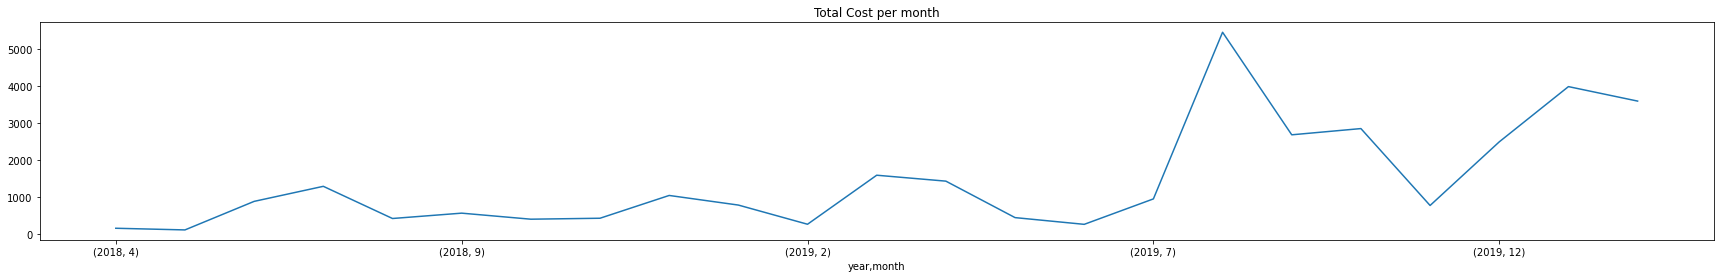

In [4]:
month_groups = invoices_df.groupby(['year', 'month'])
cost_per_year_and_month = month_groups['amount'].agg(['sum'])
cost_per_year_and_month.plot(figsize=(30,4), title="Total Cost per month", legend=False)

Resume for 2/2020
You spent the total of R$ 3595.06
Your cost per category:

outros - R$ 1599.0
restaurante - R$ 603.02
saúde - R$ 600.0
educação - R$ 438.81
transporte - R$ 188.29
lazer - R$ 99.9
supermercado - R$ 30.99
casa - R$ 20.88
serviços - R$ 18.5

Resume for 1/2020
You spent the total of R$ 3986.25
Your cost per category:

eletrônicos - R$ 1413.81
serviços - R$ 808.5400000000002
outros - R$ 688.53
restaurante - R$ 437.77
supermercado - R$ 153.88
transporte - R$ 137.0
lazer - R$ 99.9
casa - R$ 60.38
saúde - R$ 13.46

Resume for 12/2019
You spent the total of R$ 2493.77
Your cost per category:

serviços - R$ 862.1000000000001
educação - R$ 700.0
restaurante - R$ 311.48
transporte - R$ 308.38
lazer - R$ 232.9
outros - R$ 87.16
casa - R$ 19.57



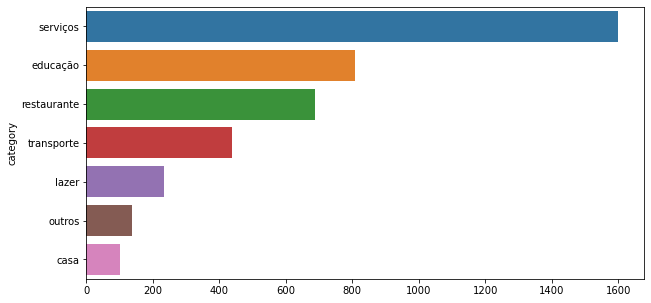

In [57]:
def cost_resume(dataframe, month, year):
    invoice_df = dataframe.query(f'month == {month} and year == {year}')
    total_cost = invoice_df['amount'].sum().round(2)
    total_cost_per_category = invoice_df.groupby('category')['amount'].agg('sum')
    total_cost_per_category = total_cost_per_category.sort_values(ascending=False)

    ax = sns.barplot(x=total_cost_per_category.values, y=total_cost_per_category.index)
    ax.figure.set_size_inches(10, 5)
    
    print(f'============================================')
    print(f'Resume for {month}/{year}')
    print(f'============================================')
    print(f'You spent the total of R$ {total_cost}')
    print(f'============================================')
    print('Your cost per category:\n')
    for index, value in total_cost_per_category.iteritems():
        print(f'{index} - R$ {value}')
    print()
    
for month, year in [(2, 2020), (1, 2020), (12, 2019)]:
    cost_resume(invoices_df, month, year)

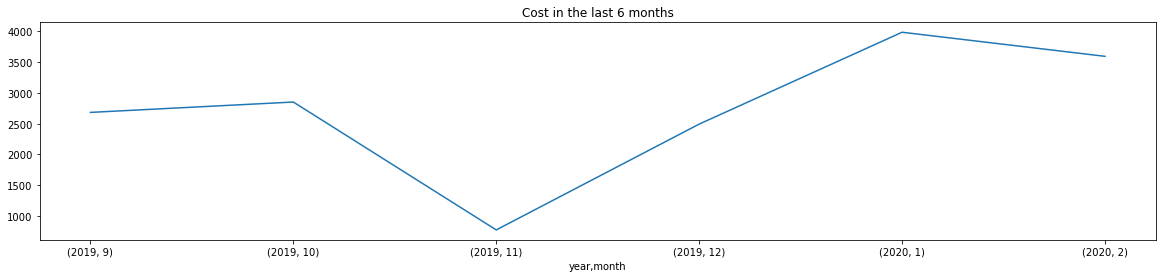

In [106]:
latest_6_months = cost_per_year_and_month[-6:]
latest_6_months.plot(legend=False, figsize=(20,4), title='Cost in the last 6 months')